In [2]:
print("hello world")
x = 4 
print(x)

hello world
4


In [1]:
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#!pip install pycocoevalca


In [2]:
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap

annotation_file = 'captions_val2014.json'
results_file = 'captions_val2014_fakecap_results.json'

# create coco object and coco_result object
coco = COCO(annotation_file)
coco_result = coco.loadRes(results_file)

loading annotations into memory...
Done (t=0.36s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!


In [3]:
#!pip install --no-warn-script-location -U scikit-learn
#!pip install --no-warn-script-location openai-clip
!pip install --no-warn-script-location imageio[pyav]

Defaulting to user installation because normal site-packages is not writeable


In [16]:
#!pip install --no-warn-script-location transformers
#!pip install --no-warn-script-location datasets

In [15]:
import numpy as np
import pandas as pd
import random 
import seaborn as sns
import os, json, pickle
import math, string
from collections import Counter
from PIL import Image
#from tqdm import tqdm
import skimage.io as io
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import AdamW
import argparse
import scipy as sc
import clip
import time, glob
from datasets import load_dataset
import nltk
from scipy import constants
import skimage.io as io

/home/apassadaki/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model, transform = clip.load("ViT-B/32", device=device)

cuda


In [7]:
x = np.array([5,4]) 
print(x)
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
print(df)
y = random.randint(0,10)
print(y)
parser = argparse.ArgumentParser()
print(constants.liter)
print(sc.__version__)

[5 4]
     A   B   C   D
0   76  47  91   2
1   81  18  49   7
2   31  77  96  65
3   86  34  15  12
4   50  37  56  53
..  ..  ..  ..  ..
95  99  48  70  61
96  75  41  39   5
97  50  13  91  52
98  82  32  68  62
99  67  14  62  91

[100 rows x 4 columns]
10
0.001
1.10.1


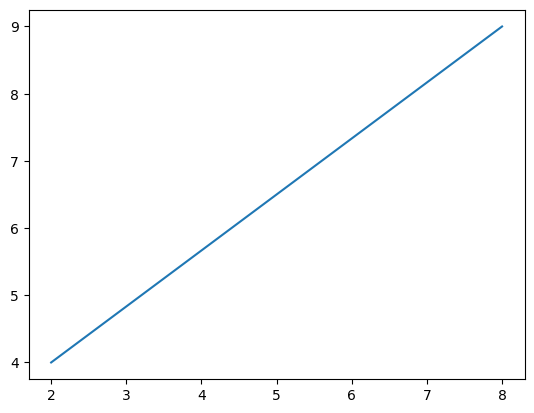

In [8]:
# X axis parameter:
xaxis = np.array([2, 8])
# Y axis parameter:
yaxis = np.array([4, 9])
plt.plot(xaxis, yaxis)
plt.show()

In [20]:
current_directory = os.getcwd()
print(current_directory)
folder_path = "/data/admitosstorage/test_images/"
for i,filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(".jpg"):
        # Get the full path of the image
        img_path = os.path.join(folder_path, filename)
        #print(img_path)
        #Image.open(img_path).show() 
        if filename == '764378.jpg':
            #os.remove(img_path)
            #print(f"Deleted {filename}")
            print("here")
        

/data/admitosstorage/code


In [42]:
def my_main(clip_model_type):
    #device = torch.device('cuda:0')
    device = "cuda" if torch.cuda.is_available() else "cpu"
    clip_model_name = clip_model_type.replace('/', '_')
    out_path = f"/data/admitosstorage/CLIP_image_embeddings/train_10.pkl"
    clip_model, preprocess = clip.load(clip_model_type, device=device, jit=False)
    path_to_dii_sis = '/data/admitosstorage/DII-SIS/dii_sis_train_annots.json'
    with open(path_to_dii_sis, 'r', encoding='utf-8') as f:
        data = json.load(f)
    print("%0d captions loaded from json " % len(data))
    all_embeddings = []
    all_captions = []
    q = 0
    for i in tqdm(range(len(data))):
    #for i in range(len(data)):
        dictionary = data[i][0]
        photo_id = dictionary["photo_flickr_id"]
        #filename = f"/data/admitosstorage/yingjin_images/{int(photo_id)}.jpg"
        filename = f"/data/admitosstorage/train10_images/{int(photo_id)}.jpg"
        if not os.path.isfile(filename):
            print("No File Found")
            continue
        else:
            print("We found a file on", i, ": ", photo_id)
            image = io.imread(filename)
            image = preprocess(Image.fromarray(image)).unsqueeze(0).to(device)
            with torch.no_grad():
                prefix = clip_model.encode_image(image).to(device)
            dictionary["clip_embedding"] = q
            q += 1
            all_embeddings.append(prefix)
            all_captions.append(dictionary)
            if (i+1)%1000 == 0:
                with open(out_path, 'wb') as f:
                    pickle.dump({"clip_embedding": torch.cat(all_embeddings, dim=0), "captions": all_captions}, f)
        

    with open(out_path, 'wb') as f:
        pickle.dump({"clip_embedding": torch.cat(all_embeddings, dim=0), "captions": all_captions}, f)

    print('Done')
    print("%0d embeddings saved " % len(all_embeddings))
    return 0

In [43]:
clip_model_type = ['ViT-B/32', 'RN50', 'RN101', 'RN50x4']
my_main(clip_model_type[0])

134795 captions loaded from json 


  2%|▏         | 2955/134795 [00:00<00:04, 29547.70it/s]

No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No Fil

  9%|▉         | 12290/134795 [00:00<00:01, 66874.44it/s]

No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No Fil

 24%|██▍       | 32206/134795 [00:00<00:01, 89388.39it/s]

No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No Fil

 42%|████▏     | 56364/134795 [00:00<00:00, 107891.84it/s]

No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No Fil

 60%|██████    | 81337/134795 [00:00<00:00, 117152.28it/s]

No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No Fil

 80%|███████▉  | 107519/134795 [00:01<00:00, 124606.92it/s]

No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No Fil

 81%|████████  | 108778/134795 [00:11<00:09, 2699.25it/s]  

We found a file on 108775 :  4232828317
We found a file on 108776 :  4232828621
We found a file on 108777 :  4233600500
We found a file on 108778 :  4232828963
We found a file on 108779 :  4232829867
We found a file on 108780 :  4232828317
We found a file on 108781 :  4232828621
We found a file on 108782 :  4233600500
We found a file on 108783 :  4232828963
We found a file on 108784 :  4232829867
We found a file on 108785 :  4232828317
We found a file on 108786 :  4232828621


 81%|████████  | 108790/134795 [00:11<00:09, 2647.99it/s]

We found a file on 108787 :  4233600500
We found a file on 108788 :  4232828963
We found a file on 108789 :  4232829867
We found a file on 108790 :  4232828317
We found a file on 108791 :  4232828621
We found a file on 108792 :  4233600500
We found a file on 108793 :  4232828963
We found a file on 108794 :  4232829867
We found a file on 108795 :  4233651330
We found a file on 108796 :  4233651528
We found a file on 108797 :  4233651900
We found a file on 108798 :  4232880749
We found a file on 108799 :  4232879245
We found a file on 108800 :  4233651330
We found a file on 108801 :  4233651528
We found a file on 108802 :  4233651900
We found a file on 108803 :  4232880749
We found a file on 108804 :  4232879245
We found a file on 108805 :  4233651330
We found a file on 108806 :  4233651528
We found a file on 108807 :  4233651900
We found a file on 108808 :  4232880749
We found a file on 108809 :  4232879245
We found a file on 108810 :  4233237451
We found a file on 108811 :  4233240655


 82%|████████▏ | 110095/134795 [00:31<00:39, 623.25it/s] 

We found a file on 110091 :  32076118
We found a file on 110092 :  32076477
We found a file on 110093 :  32077663
We found a file on 110094 :  32078125
We found a file on 110095 :  32094088
We found a file on 110096 :  32094463
We found a file on 110097 :  32094813


 82%|████████▏ | 110102/134795 [00:31<00:40, 616.87it/s]

We found a file on 110098 :  32096811
We found a file on 110099 :  32097218
We found a file on 110100 :  32094088
We found a file on 110101 :  32094463
We found a file on 110102 :  32094813
We found a file on 110103 :  32096811
We found a file on 110104 :  32097218
We found a file on 110105 :  32094088
We found a file on 110106 :  32094463
We found a file on 110107 :  32094813
We found a file on 110108 :  32096811
We found a file on 110109 :  32097218
We found a file on 110110 :  32171548
We found a file on 110111 :  32171693
We found a file on 110112 :  32171895
We found a file on 110113 :  32171954
We found a file on 110114 :  32172028
We found a file on 110115 :  32171548
We found a file on 110116 :  32171693
We found a file on 110117 :  32171895
We found a file on 110118 :  32171954
We found a file on 110119 :  32172028
We found a file on 110120 :  32171548
We found a file on 110121 :  32171693
We found a file on 110122 :  32171895
We found a file on 110123 :  32171954
We found a f

 82%|████████▏ | 111118/134795 [00:51<01:27, 270.74it/s]

We found a file on 111106 :  13992650
We found a file on 111107 :  13992889
We found a file on 111108 :  13993083
We found a file on 111109 :  13993349
We found a file on 111110 :  13992563
We found a file on 111111 :  13992650
We found a file on 111112 :  13992889
We found a file on 111113 :  13993083
We found a file on 111114 :  13993349
We found a file on 111115 :  14027192
We found a file on 111116 :  14027215
We found a file on 111117 :  14027102
We found a file on 111118 :  14027565
We found a file on 111119 :  14027694
We found a file on 111120 :  14027192


 82%|████████▏ | 111126/134795 [00:51<01:27, 269.84it/s]

We found a file on 111121 :  14027215
We found a file on 111122 :  14027102
We found a file on 111123 :  14027565
We found a file on 111124 :  14027694
We found a file on 111125 :  14027192
We found a file on 111126 :  14027215
We found a file on 111127 :  14027102
We found a file on 111128 :  14027565
We found a file on 111129 :  14027694
We found a file on 111130 :  14027192
We found a file on 111131 :  14027215
We found a file on 111132 :  14027102
We found a file on 111133 :  14027565
We found a file on 111134 :  14027694
We found a file on 111135 :  14034131
We found a file on 111136 :  14033847
We found a file on 111137 :  14034057
We found a file on 111138 :  14033807
We found a file on 111139 :  14034265
We found a file on 111140 :  14034131
We found a file on 111141 :  14033847
We found a file on 111142 :  14034057
We found a file on 111143 :  14033807
We found a file on 111144 :  14034265
We found a file on 111145 :  14034131
We found a file on 111146 :  14033847
We found a f

 83%|████████▎ | 112466/134795 [01:11<02:22, 157.05it/s]

We found a file on 112465 :  15275674
We found a file on 112466 :  15275702
We found a file on 112467 :  15275505


 83%|████████▎ | 112473/134795 [01:12<02:23, 155.35it/s]

We found a file on 112468 :  15275537
We found a file on 112469 :  15275570
We found a file on 112470 :  15275674
We found a file on 112471 :  15275702
We found a file on 112472 :  15275505
We found a file on 112473 :  15275537
We found a file on 112474 :  15275570
We found a file on 112475 :  15275674
We found a file on 112476 :  15275702
We found a file on 112477 :  15275505
We found a file on 112478 :  15275537
We found a file on 112479 :  15275570
We found a file on 112480 :  15390772
We found a file on 112481 :  15390404
We found a file on 112482 :  15390419
We found a file on 112483 :  15389851
We found a file on 112484 :  15390338
We found a file on 112485 :  15390772
We found a file on 112486 :  15390404
We found a file on 112487 :  15390419
We found a file on 112488 :  15389851
We found a file on 112489 :  15390338
We found a file on 112490 :  15390772
We found a file on 112491 :  15390404
We found a file on 112492 :  15390419
We found a file on 112493 :  15389851
We found a f

 84%|████████▍ | 113620/134795 [01:31<03:23, 104.20it/s]

We found a file on 113612 :  16662027
We found a file on 113613 :  16489781
We found a file on 113614 :  16490960
We found a file on 113615 :  16485948
We found a file on 113616 :  16490831
We found a file on 113617 :  16662027
We found a file on 113618 :  16489781
We found a file on 113619 :  16490960
We found a file on 113620 :  16612248
We found a file on 113621 :  16612252
We found a file on 113622 :  16616934
We found a file on 113623 :  16619571
We found a file on 113624 :  16621292
We found a file on 113625 :  16612248
We found a file on 113626 :  16612252
We found a file on 113627 :  16616934
We found a file on 113628 :  16619571
We found a file on 113629 :  16621292
We found a file on 113630 :  16612248
We found a file on 113631 :  16612252
We found a file on 113632 :  16616934
We found a file on 113633 :  16619571
We found a file on 113634 :  16621292
We found a file on 113635 :  926303758
We found a file on 113636 :  925459985
We found a file on 113637 :  926309140
We found 

 85%|████████▌ | 114882/134795 [01:51<03:59, 83.02it/s] 

We found a file on 114868 :  6796912595
We found a file on 114869 :  6796913917
We found a file on 114870 :  6796914285
We found a file on 114871 :  6796910283
We found a file on 114872 :  6796912161
We found a file on 114873 :  6796912595
We found a file on 114874 :  6796913917
We found a file on 114875 :  6796914285
We found a file on 114876 :  6796910283
We found a file on 114877 :  6796912161
We found a file on 114878 :  6796912595
We found a file on 114879 :  6796913917
We found a file on 114880 :  6796914285
We found a file on 114881 :  6796910283
We found a file on 114882 :  6796912161
We found a file on 114883 :  6796912595


 85%|████████▌ | 114890/134795 [01:51<03:59, 82.99it/s]

We found a file on 114884 :  6796913917
We found a file on 114885 :  31302136
We found a file on 114886 :  31301827
We found a file on 114887 :  31304363
We found a file on 114888 :  31304118
We found a file on 114889 :  31303872
We found a file on 114890 :  31302136
We found a file on 114891 :  31301827
We found a file on 114892 :  31304363
We found a file on 114893 :  31304118
We found a file on 114894 :  31303872
We found a file on 114895 :  31302136
We found a file on 114896 :  31301827
We found a file on 114897 :  31304363
We found a file on 114898 :  31304118
We found a file on 114899 :  31303872
We found a file on 114900 :  26739766
We found a file on 114901 :  26739999
We found a file on 114902 :  26740200
We found a file on 114903 :  26745273
We found a file on 114904 :  26746097
We found a file on 114905 :  26739766
We found a file on 114906 :  26739999
We found a file on 114907 :  26740200
We found a file on 114908 :  26745273
We found a file on 114909 :  26746097
We found a

 86%|████████▌ | 116220/134795 [02:11<04:08, 74.66it/s]

We found a file on 116216 :  2150238584
We found a file on 116217 :  2150224820
We found a file on 116218 :  2149444887
We found a file on 116219 :  2150221080
We found a file on 116220 :  2150237708


 86%|████████▌ | 116229/134795 [02:11<04:08, 74.69it/s]

We found a file on 116221 :  2150238584
We found a file on 116222 :  2150224820
We found a file on 116223 :  2149444887
We found a file on 116224 :  2150221080
We found a file on 116225 :  2150237708
We found a file on 116226 :  2150238584
We found a file on 116227 :  2150224820
We found a file on 116228 :  2149444887
We found a file on 116229 :  2150221080
We found a file on 116230 :  2043842794
We found a file on 116231 :  2043045791
We found a file on 116232 :  2043845040
We found a file on 116233 :  2043852080
We found a file on 116234 :  2043853296
We found a file on 116235 :  2043842794
We found a file on 116236 :  2043045791
We found a file on 116237 :  2043845040
We found a file on 116238 :  2043852080
We found a file on 116239 :  2043853296
We found a file on 116240 :  2043842794
We found a file on 116241 :  2043045791
We found a file on 116242 :  2043845040
We found a file on 116243 :  2043852080
We found a file on 116244 :  2043853296
We found a file on 116245 :  2061822754


 89%|████████▉ | 120089/134795 [02:26<01:15, 195.19it/s]

We found a file on 117231 :  4375244852
We found a file on 117232 :  4375239504
We found a file on 117233 :  4374491939
We found a file on 117234 :  4375246448
We found a file on 117235 :  4375250502
We found a file on 117236 :  4375244852
We found a file on 117237 :  4375239504
We found a file on 117238 :  4374491939
We found a file on 117239 :  4375246448
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Fo

100%|██████████| 134795/134795 [02:26<00:00, 921.83it/s]


No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No File Found
No Fil

0

In [6]:
# path_to_test_dii_sis = '/data/admitosstorage/DII-SIS/dii_sis_test_annots.json'
# with open(path_to_test_dii_sis, 'r', encoding='utf-8') as f:
#     test_dicts = json.load(f)

In [12]:
data_path = '/data/admitosstorage/CLIP_image_embeddings/val.pkl' 
with open(data_path, 'rb') as f:
    embeddings = pickle.load(f)

print(len(embeddings))
print(len(embeddings['captions']))
print(len(embeddings['clip_embedding']))

2
11964
11964


In [7]:
for i in range(13):
    data_path = f"/data/admitosstorage/CLIP_image_embeddings/train_{i}.pkl"
    
    # Load the file using pickle
    with open(data_path, 'rb') as f:
        test_embeddings = pickle.load(f)
    
    # Convert any CUDA tensors to CPU tensors
    if isinstance(test_embeddings, torch.Tensor) and test_embeddings.is_cuda:
        test_embeddings = test_embeddings.cpu()
    elif isinstance(test_embeddings, dict):
        for key in test_embeddings:
            if isinstance(test_embeddings[key], torch.Tensor) and test_embeddings[key].is_cuda:
                test_embeddings[key] = test_embeddings[key].cpu()
    
    with open(data_path, 'wb') as f:
        pickle.dump(test_embeddings, f)

In [3]:
import pickle
import os

# Define the directory where your pickle files are located
directory = '/data/admitosstorage/CLIP_image_embeddings/'

# Initialize an empty list to store the loaded data from each pickle file
combined_data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.pkl') and filename[0:2]=='tr':
        # Construct the full path to the pickle file
        filepath = os.path.join(directory, filename)
        
        # Load the data from the pickle file
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
        
        # Append the loaded data to the combined_data list
        combined_data.append(data)

# Now combined_data contains the data from all the pickle files
# You can further process or manipulate this combined data as needed


In [22]:
all_clip_empbeddings = [combined_data[i]['clip_embedding'] for i in range(len(combined_data))]
merged_embeddings = all_clip_empbeddings[0]
for i,clip_embedding in enumerate(all_clip_empbeddings):
    if(i==0):
        continue
    else:
        merged_embeddings = torch.cat((merged_embeddings,clip_embedding), 0)

In [28]:
all_captions = [combined_data[i]['captions'] for i in range(len(combined_data))]
merged_captions = all_captions[0]
for i,caps in enumerate(all_captions) :
    if(i==0):
        continue
    else:
        merged_captions = merged_captions + caps

In [35]:
print(len(merged_captions))
print(merged_embeddings.shape)
my_out_path = "/data/admitosstorage/CLIP_image_embeddings/all_train.pkl"
with open(my_out_path, 'wb') as f:
    pickle.dump({"clip_embedding": merged_embeddings, "captions": merged_captions}, f)

133272
torch.Size([133272, 512])
